<div align="center">
    <h1><b>Bottlers FC Analysis</b></h1>
    <span>Identifying the biggest "bottlers" in European football - teams that consistently underperform despite being close to success.</span>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Setup
This section loads the required football data from CSV files:
- `games.csv`: Match results and statistics
- `competitions.csv`: League information
- `clubs.csv`: Team information

We filter for only the top 5 European leagues:
- Premier League (GB1)
- La Liga (ES1)
- Bundesliga (L1)
- Serie A (IT1)
- Ligue 1 (FR1)

In [2]:
try:
    top_leagues = ['ES1', 'GB1', 'L1', 'IT1', 'FR1']

    games = pd.read_csv("data/games.csv")
    comps = pd.read_csv("data/competitions.csv")
    clubs = pd.read_csv("data/clubs.csv")

    games = games[games['competition_id'].isin(top_leagues)]
    comps = comps[comps['competition_id'].isin(top_leagues)]
    clubs = clubs[clubs['domestic_competition_id'].isin(top_leagues)]

except FileNotFoundError as e:
    print("Error: Missing data files. Please download from Kaggle and place in /data folder.")
    print("Dataset: https://www.kaggle.com/datasets/davidcariboo/player-scores")
    raise e


In [3]:
games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


In [4]:
comps.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True
10,FR1,ligue-1,ligue-1,first_tier,domestic_league,50,France,FR1,europa,https://www.transfermarkt.co.uk/ligue-1/starts...,True
11,IT1,serie-a,serie-a,first_tier,domestic_league,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/serie-a/starts...,True
16,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,https://www.transfermarkt.co.uk/premier-league...,True
33,L1,bundesliga,bundesliga,first_tier,domestic_league,40,Germany,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...,True


In [5]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
15,269,holstein-kiel,Kieler Sportvereinigung Holstein von 1900,L1,NaN,29,26.3,11,37.9,4,Holstein-Stadion,15034,€-6.20m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/holstein-kiel/...
21,4795,fc-ingolstadt-04,FC Ingolstadt 04,L1,NaN,28,24.3,8,28.6,1,Audi Sportpark,15800,+€1.55m,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/fc-ingolstadt-...


### Points Calculation
Here we calculate match points (3 for win, 1 for draw, 0 for loss) for both home and away teams. This creates the foundation for our league table calculations.

In [6]:
games['home_points'] = games.apply(
    lambda row: 3 if row['home_club_goals'] > row['away_club_goals'] else
                1 if row['away_club_goals'] == row['home_club_goals'] else 0,
    axis=1
)

games['away_points'] = games.apply(
    lambda row: 3 if row['home_club_goals'] < row['away_club_goals'] else
                1 if row['away_club_goals'] == row['home_club_goals'] else 0,
    axis=1
)

games.head()[['home_club_name', 'away_club_name', 'home_points', 'away_points']]

,home_club_name,away_club_name,home_points,away_points
0,FC Schalke 04,Hamburger SV,1,1
1,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0,3
2,Borussia Dortmund,Eintracht Braunschweig,3,0
3,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0,3
4,Borussia Dortmund,Hamburger SV,3,0


In [7]:
home_stats = games.groupby(['season', 'competition_id', 'home_club_id']).agg(
    home_wins=('home_points', lambda x: (x == 3).sum()),
    home_draws=('home_points', lambda x: (x == 1).sum()),
    home_losses=('home_points', lambda x: (x == 0).sum()),
    home_goals_for=('home_club_goals', 'sum'),
    home_goals_against=('away_club_goals', 'sum'),
    home_points=('home_points', 'sum')
).reset_index()

away_stats = games.groupby(['season', 'competition_id', 'away_club_id']).agg(
    away_wins=('away_points', lambda x: (x == 3).sum()),
    away_draws=('away_points', lambda x: (x == 1).sum()),
    away_losses=('away_points', lambda x: (x == 0).sum()),
    away_goals_for=('away_club_goals', 'sum'),
    away_goals_against=('home_club_goals', 'sum'),
    away_points=('away_points', 'sum')
).reset_index()

points_table = pd.merge(
    home_stats.rename(columns={'home_club_id': 'club_id'}),
    away_stats.rename(columns={'away_club_id': 'club_id'}),
    on=['season', 'competition_id', 'club_id'],
    how='outer'
).fillna(0)

points_table['total_wins'] = points_table['home_wins'] + points_table['away_wins']
points_table['total_draws'] = points_table['home_draws'] + points_table['away_draws']
points_table['total_losses'] = points_table['home_losses'] + points_table['away_losses']
points_table['total_goals_for'] = points_table['home_goals_for'] + points_table['away_goals_for']
points_table['total_goals_against'] = points_table['home_goals_against'] + points_table['away_goals_against']
points_table['total_points'] = points_table['home_points'] + points_table['away_points']
points_table['goal_difference'] = points_table['total_goals_for'] - points_table['total_goals_against']

points_table = pd.merge(
    points_table,
    clubs[['club_id', 'name']],
    on='club_id',
    how='left'
)

points_table = pd.merge(
    points_table,
    comps[['competition_id', 'name']].rename(columns={'name': 'competition_name'}),
    on='competition_id',
    how='left'
)

points_table = points_table.sort_values(
    by=['competition_id', 'season', 'total_points', 'goal_difference'],
    ascending=[True, True, False, False]
)

points_table = points_table.sort_values(
    by=['competition_id', 'season', 'total_points', 'goal_difference'],
    ascending=[True, True, False, False]
)

points_table['rank'] = points_table.groupby(
    ['competition_id', 'season']
).cumcount() + 1

points_table.to_csv('output/points_table.csv', index=False)
points_table.head()[['name', 'season', 'total_points', 'goal_difference', 'competition_name']]

,name,season,total_points,goal_difference,competition_name
1,Futbol Club Barcelona,2012,100,75.0,laliga
9,Real Madrid Club de Fútbol,2012,85,61.0,laliga
0,Club Atlético de Madrid S.A.D.,2012,76,34.0,laliga
11,Real Sociedad de Fútbol S.A.D.,2012,66,21.0,laliga
15,Valencia Club de Fútbol S. A. D.,2012,65,13.0,laliga


### Bottle Score Formula
The bottle score measures how much a team "bottled" their league position by:
1. **Rank Penalty**: Base score based on final league position (2 points per position below 1st)
2. **Points Gap Penalty**:
   - 100/GD difference if tied on points with champion
   - 50/points difference otherwise
3. **Normalization**: Scores scaled to 0-100 range for comparability

Champions automatically receive a score of 0.

In [8]:
max_season = points_table['season'].max()

league_sizes = points_table.groupby(['competition_id', 'season']).size().reset_index(name='league_size')
points_table = pd.merge(
    points_table,
    league_sizes,
    on=['competition_id', 'season'],
    how='left'
)

champs = points_table[points_table['rank'] == 1][['competition_id', 'season', 'total_points', 'goal_difference']]
champs.columns = ['competition_id', 'season', 'champ_points', 'champ_gd']
points_table = pd.merge(points_table, champs, on=['competition_id', 'season'])

points_table['rank_penalty'] = np.where(
    points_table['rank'] == 1,
    0,
    2*(points_table['league_size'] - points_table['rank'] + 1)
)
points_table['points_gap_penalty'] = np.where(
    points_table['rank'] == 1,
    0,
    np.where(
        points_table['total_points'] == points_table['champ_points'],
        100 / (points_table['champ_gd'] - points_table['goal_difference']),
        50 / (points_table['champ_points'] - points_table['total_points'])
    )
)

points_table['bottle_score'] = (
    points_table['rank_penalty'] +
    points_table['points_gap_penalty']
)

max_score = points_table['bottle_score'].max()
if max_score > 0:
    points_table['bottle_score'] = (points_table['bottle_score'] / max_score) * 100

points_table.drop(['league_size', 'champ_points', 'champ_gd'], axis=1, inplace=True)

points_table.to_csv('output/points_table.csv')

In [9]:
points_table.head()[['season', 'name', 'competition_id', 'rank', 'bottle_score', 'total_points', 'goal_difference']]

,season,name,competition_id,rank,bottle_score,total_points,goal_difference
0,2012,Futbol Club Barcelona,ES1,1,0.000000,100,75.0
1,2012,Real Madrid Club de Fútbol,ES1,2,46.969697,85,61.0
2,2012,Club Atlético de Madrid S.A.D.,ES1,3,43.276515,76,34.0
3,2012,Real Sociedad de Fútbol S.A.D.,ES1,4,40.307487,66,21.0
4,2012,Valencia Club de Fútbol S. A. D.,ES1,5,37.987013,65,13.0


In [10]:
club_bs = points_table.groupby(['club_id', 'competition_id'])[['bottle_score']].sum().reset_index()
club_bs.columns = ['club_id', 'competition_id', 'total_bottle_score']

clubs_bottle_scores = pd.merge(
    clubs,
    club_bs,
    on='club_id',
    how='left'
).fillna(0)

clubs_bottle_scores = clubs_bottle_scores.sort_values('total_bottle_score', ascending=False)

clubs_bottle_scores = pd.merge(
    clubs_bottle_scores,
    comps[['competition_id', 'name']].rename(columns={'name': 'league_name'}),
    on='competition_id',
    how='left'
)

clubs_bottle_scores.to_csv('output/clubs_bottle_scores.csv')
clubs_bottle_scores[['name', 'total_bottle_score', 'league_name']].head(10)

,name,total_bottle_score,league_name
0,Liverpool Football Club,587.360571,premier-league
1,Arsenal Football Club,572.887438,premier-league
2,Società Sportiva Calcio Napoli,553.755283,serie-a
3,Real Madrid Club de Fútbol,544.400858,laliga
4,Borussia Dortmund,534.871135,bundesliga
5,Associazione Sportiva Roma,529.921832,serie-a
6,Olympique Lyonnais,522.372732,ligue-1
7,Club Atlético de Madrid S.A.D.,513.545019,laliga
8,Olympique de Marseille,512.326252,ligue-1
9,Tottenham Hotspur Football Club,496.010716,premier-league


### Visualization Setup
We define consistent styling for both dark and light mode plots:
- Color schemes for each league
- Figure backgrounds and text colors
- Grid and edge styling

This ensures all visualizations maintain a professional, cohesive look.

In [11]:
league_colors = {
    'GB1' : '#432060',
    'IT1' : '#005cff',
    'ES1' : '#ff5049',
    'FR1' : '#122c62',
    'L1'  : '#d2000c',
}

style_params = {
    'dark': {
        'figure_bg': '#121212',
        'axes_bg': '#121212',
        'text_color': 'white',
        'grid_color': '#333333',
        'edge_color': 'white',
        'score_color': 'white',
    },
    'light': {
        'figure_bg': 'white',
        'axes_bg': 'white',
        'text_color': 'black',
        'grid_color': '#dddddd',
        'edge_color': 'black',
        'score_color': 'black',
    }
}

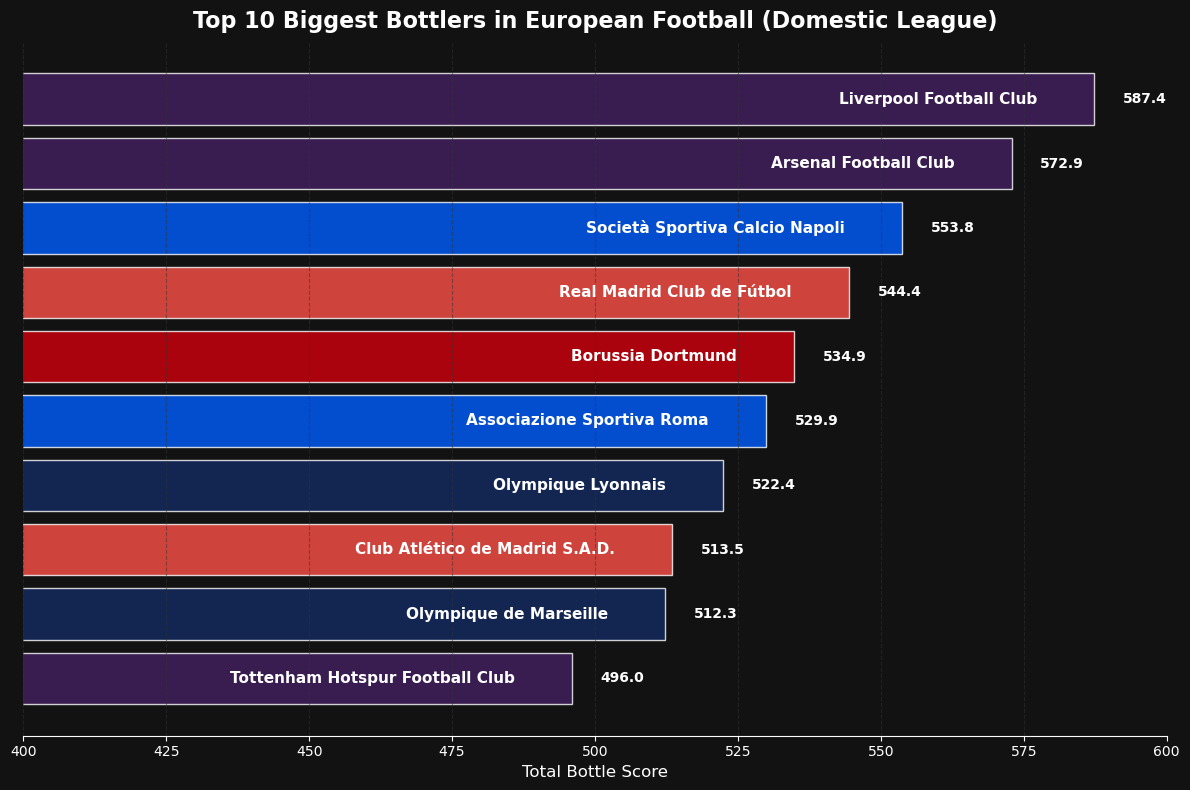

In [12]:
top10_bottlers = (
    clubs_bottle_scores
    .reset_index()
    .sort_values('total_bottle_score', ascending=False)
    .head(10)
)

for version, style in style_params.items():
    plt.figure(figsize=(12, 8), facecolor=style['figure_bg'])
    ax = plt.gca()
    ax.invert_yaxis()
    ax.set_facecolor(style['axes_bg'])
    
    bars = plt.barh(
        range(10),
        top10_bottlers['total_bottle_score'],
        color=[league_colors[league] for league in top10_bottlers['competition_id']],
        alpha=0.8,
        edgecolor=style['edge_color'],
        linewidth=1
    )
    
    plt.title('Top 10 Biggest Bottlers in European Football (Domestic League)',
              fontsize=16, pad=10, color=style['text_color'], fontweight='bold')
    plt.xlabel('Total Bottle Score', fontsize=12, color=style['text_color'])
    plt.yticks([])
    plt.xlim(400, 600)
    
    ax.tick_params(axis='x', colors=style['text_color'])
    plt.grid(axis='x', color=style['grid_color'], linestyle='--', alpha=0.5)
    
    for idx, bar in enumerate(bars):
        width = bar.get_width()
        club_name = top10_bottlers.iloc[idx]['name']
        
        plt.text(
            width - 10,
            bar.get_y() + bar.get_height()/2,
            club_name,
            va='center',
            ha='right',
            color='white',
            fontweight='bold',
            fontsize=11
        )
        
        plt.text(
            width + 5,
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}',
            va='center',
            ha='left',
            color=style['text_color'],
            fontweight='bold'
        )
    
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_color(style['text_color'])
    
    plt.tight_layout()
    plt.savefig('output/visualizations/top10_bottlers_'+version+'.png', dpi=300, bbox_inches='tight')
    if version == 'dark':
        plt.show()
    else:
        plt.close()

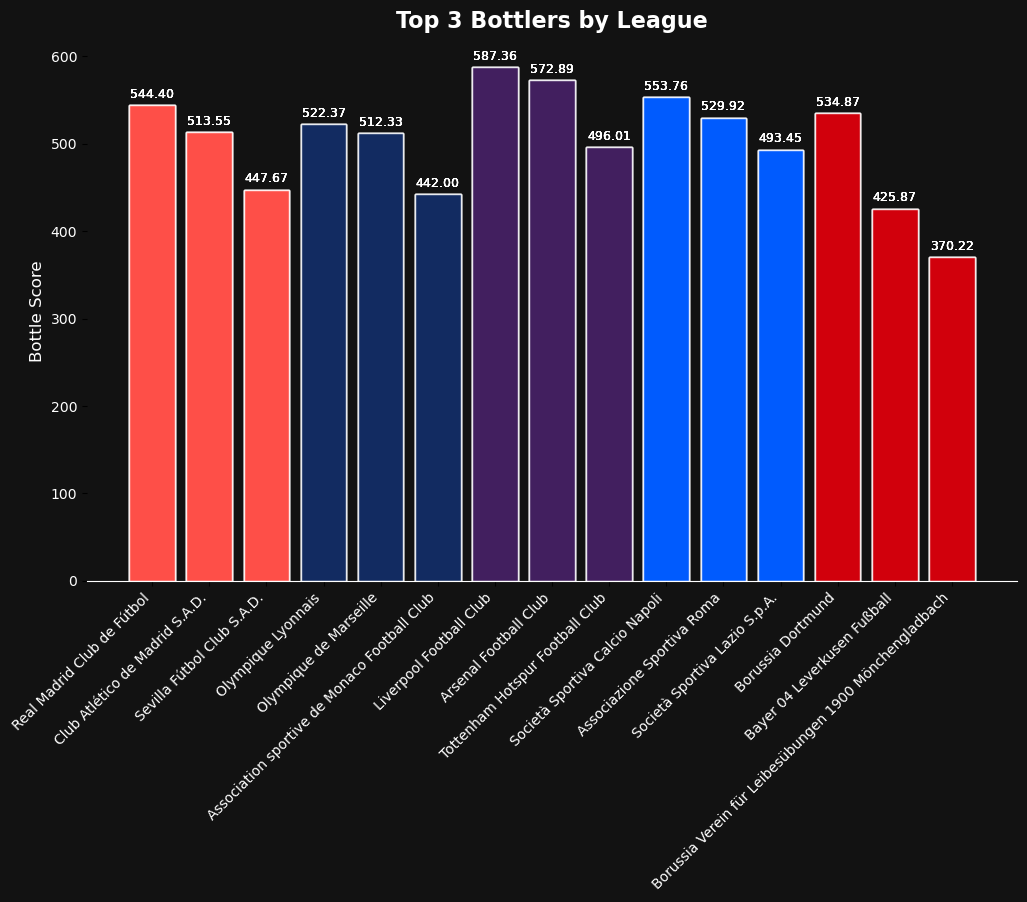

In [13]:
top3_bottlers_by_league = (
    clubs_bottle_scores.groupby(['competition_id', 'club_id', 'name'])
    ['total_bottle_score'].sum()
    .groupby('competition_id', group_keys=False)
    .apply(lambda x: x.nlargest(3))
    .reset_index()
    .sort_values('competition_id', ascending=True)
)

top3_bottlers_by_league = pd.merge(
    top3_bottlers_by_league,
    comps[['competition_id', 'name']].rename(columns={'name': 'league_name'}),
    on='competition_id'
)

for version, style in style_params.items():
    plt.figure(figsize=(12, 7), facecolor=style['figure_bg'])
    ax = plt.gca()
    ax.set_facecolor(style['axes_bg'])

    for league, group in top3_bottlers_by_league.groupby('competition_id'):
        plt.bar(
            top3_bottlers_by_league['name'],
            top3_bottlers_by_league['total_bottle_score'],
            alpha=0.8,
            label=league,
            color=[league_colors[league] for league in top3_bottlers_by_league['competition_id']],
            edgecolor=style['edge_color'],
            linewidth=1
        )

    plt.title('Top 3 Bottlers by League', fontsize=16, pad=10, color=style['text_color'], fontweight='bold')
    plt.ylabel('Bottle Score', fontsize=12, color=style['text_color'])
    plt.xticks(rotation=45, ha='right', fontsize=10, color=style['text_color'])
    plt.yticks(color=style['text_color'])

    for bar in plt.gca().patches:
        plt.gca().text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color=style['text_color']
        )

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_color(style['text_color'])

    plt.savefig('output/visualizations/top3_bottlers_per_league_'+version+'.png',
                dpi=300, bbox_inches='tight', facecolor=style['figure_bg'])
    
    if version == 'dark':
        plt.show()
    else:
        plt.close()